# Experiment 2: Airline Route Network Analysis

**Aim**: Building a network and network measures using NetworkX:
1. Degree & Degree Distribution
2. Clustering
3. Node Centrality measures

**Theory**:
The experiment focuses on assessing network characteristics such as degree, clustering, and node centrality measures (Degree, Betweenness, Closeness, Eigenvector).

**Problem Statement**:
Analyze the route network of an international airline.
Nodes: NY, LD, DB, TK, LA, MU, SY, BJ
Edges: NY-LD, NY-LA, LD-DB, LD-TK, DB-MU, DB-BJ, TK-SY, TK-BJ, LA-SY


In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
# 1. Create the Network
G = nx.Graph()

# Nodes
cities = ["NY", "LD", "DB", "TK", "LA", "MU", "SY", "BJ"]
G.add_nodes_from(cities)

# Edges (Direct flights)
flights = [
    ("NY", "LD"), ("NY", "LA"),
    ("LD", "DB"), ("LD", "TK"),
    ("DB", "MU"), ("DB", "BJ"),
    ("TK", "SY"), ("TK", "BJ"),
    ("LA", "SY")
]
G.add_edges_from(flights)


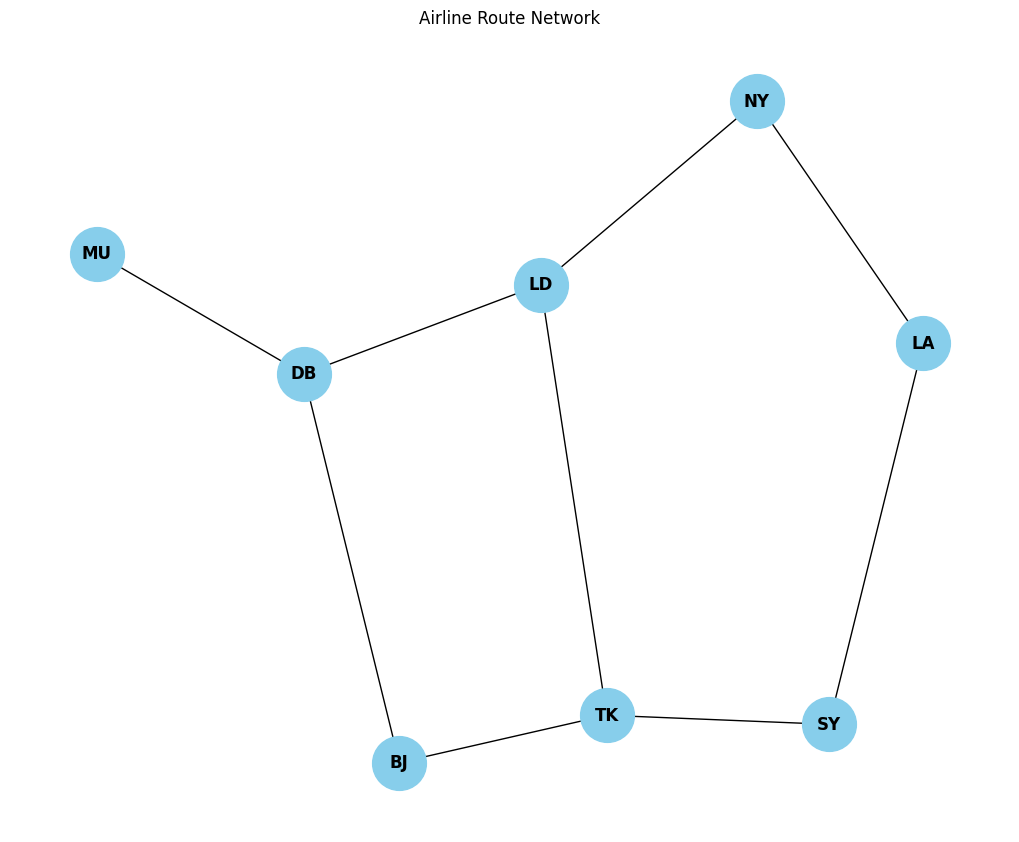

In [3]:
# Visualization
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G, seed=42)  # Consistent layout
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=1500, font_size=12, font_weight='bold')
plt.title("Airline Route Network")
plt.show()


Node Degrees:
NY: 2
LD: 3
DB: 3
TK: 3
LA: 2
MU: 1
SY: 2
BJ: 2


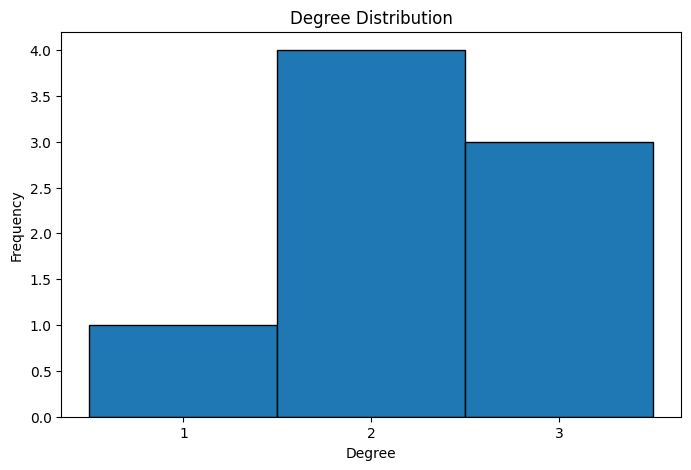

In [4]:
# 2. Degree and Degree Distribution
degree_dict = dict(G.degree())
print("Node Degrees:")
for node, degree in degree_dict.items():
    print(f"{node}: {degree}")

# Degree Distribution Plot
degrees = [d for n, d in G.degree()]
plt.figure(figsize=(8, 5))
plt.hist(degrees, bins=range(min(degrees), max(degrees) + 2), edgecolor='black', align='left')
plt.title("Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.xticks(range(min(degrees), max(degrees) + 1))
plt.show()


In [5]:
# 3. Clustering Coefficient
clustering = nx.clustering(G)
avg_clustering = nx.average_clustering(G)

print("\nClustering Coefficients:")
for node, cc in clustering.items():
    print(f"{node}: {cc:.4f}")
print(f"\nAverage Clustering Coefficient: {avg_clustering:.4f}")



Clustering Coefficients:
NY: 0.0000
LD: 0.0000
DB: 0.0000
TK: 0.0000
LA: 0.0000
MU: 0.0000
SY: 0.0000
BJ: 0.0000

Average Clustering Coefficient: 0.0000


In [6]:
# 4. Centrality Measures
degree_cent = nx.degree_centrality(G)
betweenness_cent = nx.betweenness_centrality(G)
closeness_cent = nx.closeness_centrality(G)
eigenvector_cent = nx.eigenvector_centrality(G)

# Create a DataFrame for easy comparison
centrality_df = pd.DataFrame({
    'Degree Centrality': degree_cent,
    'Betweenness Centrality': betweenness_cent,
    'Closeness Centrality': closeness_cent,
    'Eigenvector Centrality': eigenvector_cent
})

print("\nCentrality Measures:")
print(centrality_df)



Centrality Measures:
    Degree Centrality  Betweenness Centrality  Closeness Centrality  \
NY           0.285714                0.142857              0.500000   
LD           0.428571                0.380952              0.636364   
DB           0.428571                0.333333              0.538462   
TK           0.428571                0.285714              0.583333   
LA           0.285714                0.047619              0.437500   
MU           0.142857                0.000000              0.368421   
SY           0.285714                0.095238              0.466667   
BJ           0.285714                0.095238              0.500000   

    Eigenvector Centrality  
NY                0.294877  
LD                0.480198  
DB                0.413874  
TK                0.462166  
LA                0.238830  
MU                0.169731  
SY                0.287482  
BJ                0.359267  


In [7]:
# Helper Functions (as per requirement)

def get_most_influential_node(centrality_dict, metric_name):
    node = max(centrality_dict, key=centrality_dict.get)
    return node, centrality_dict[node]

most_imp_degree = get_most_influential_node(degree_cent, "Degree")
print(f"\nMost Influential Node (Degree): {most_imp_degree[0]} with score {most_imp_degree[1]:.4f}")



Most Influential Node (Degree): LD with score 0.4286


**Observation and Conclusion**:

1. **Degree**: Nodes like LD, DB, and TK have higher degrees, indicating they are major hubs connecting different regions.
2. **Clustering**: The clustering coefficients indicate how connected a city's neighbors are. A value of 0 means neighbors are not directly connected.
3. **Centrality**:
   - **Degree Centrality** highlights the busiest airports.
   - **Betweenness Centrality** identifies bridges; for example, LD and DB likely have high betweenness as they connect West to East.
   - **Closeness Centrality** shows how quickly a node can reach all others.

The airline network relies heavily on a few key hubs (LD, DB, TK) to maintain connectivity across the globe.
